## Community attitudes 

Here is a small collection of plots that show community sentiment over the period which we are monitoring:

  - The All Ordinaries index from the Australian Stock Exchange
  - Google searches (see google trends) on virus / stay-at-home related topics
  - Google mobility data for Australian states
  
 

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams, cycler

### All ordinaries data 

Downloaded from yahoo finance on June 15, 2020



In [2]:
allords = pandas.read_csv("data/AllOrd.csv", parse_dates=True)
allords.loc[:,'Date'] # > pandas.to_datetime('2020-02-01')
allords['Date'] = pandas.to_datetime(allords['Date'], format='%Y-%m-%d')
allords.set_index("Date", inplace=True)

allords_dec_highs = allords.loc["2019-12-01":"2020-01-01", "High"].max()

# Take a look
allords

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-18,6609.399902,6650.899902,6608.299805,6647.899902,6647.899902,1062712700
2019-06-19,6647.899902,6728.500000,6647.899902,6728.500000,6728.500000,946425700
2019-06-20,6728.500000,6767.899902,6720.799805,6767.899902,6767.899902,1301164000
2019-06-21,6767.899902,6773.399902,6725.700195,6734.299805,6734.299805,1589634100
2019-06-24,6734.299805,6745.500000,6700.299805,6745.500000,6745.500000,822682400
...,...,...,...,...,...,...
2020-06-12,6079.500000,6079.500000,5862.600098,5959.899902,5959.899902,2081144700
2020-06-15,5959.899902,5975.700195,5830.000000,5830.000000,5830.000000,1548717100
2020-06-16,5830.000000,6088.899902,5830.000000,6058.100098,6058.100098,1518264700


In [3]:
allords_sm  = allords.resample('4H')
allords_sm = allords_sm.interpolate(method="spline", order=3)

/Users/lmoresi/opt/anaconda3/envs/covid/lib/python3.7/site-packages/matplotlib/collections.py:886: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


(737425.0, 737594.0)

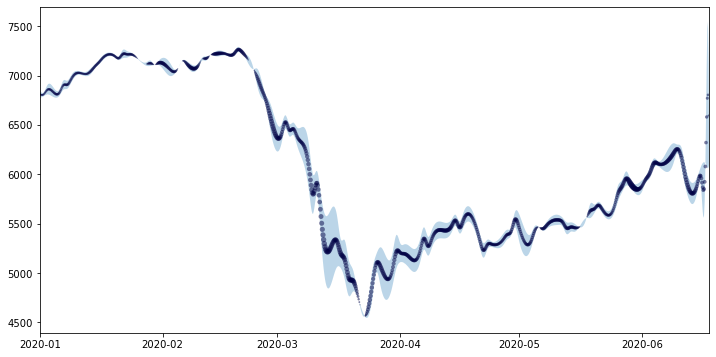

In [4]:
fig = plt.figure(figsize=(12,6))
    

plt.fill_between(allords_sm.index, allords_sm["Low"], allords_sm["High"],  alpha=0.3)
plt.scatter(allords_sm.index, allords_sm.loc[:,["High","Low"]].mean(axis=1), marker='o', linewidth=0.0, s=allords_sm["Volume"]*1.0e-8, color="#00004480")

plt.xlim((pandas.to_datetime("2020-01-01"), allords_sm.index.max()))

### Apple mobility data

Downloaded on June 15, 2020

These data are from queries on apple maps related to driving, public transport, or walking for major cities and driving directions amalgamated by state.

In [5]:
apple = pandas.read_csv("data/applemobilitytrends-2020-06-15.csv", parse_dates=True)
au_apple_data = apple[apple["country"]=="Australia"]
au_apple_data.set_index(["region", "transportation_type"], inplace=True)
au_apple_data = au_apple_data.drop(['geo_type', "alternative_name", 'sub-region','country'], axis=1).transpose()
au_apple_data["Date"]=pandas.to_datetime(au_apple_data.index)

au_apple_data

region              Adelaide                 Brisbane                  \
transportation_type  driving transit walking  driving transit walking   
2020-01-13            100.00  100.00  100.00   100.00  100.00  100.00   
2020-01-14            103.08   98.16  108.27   100.66  100.45   98.17   
2020-01-15            103.99   97.91  108.97   108.23  100.07   97.04   
2020-01-16            106.88   96.21  115.69   107.65   97.53  102.04   
2020-01-17            104.49   86.22  106.55   108.75   91.90  106.63   
...                      ...     ...     ...      ...     ...     ...   
2020-06-11             96.39   65.73   75.58   102.09   52.63   67.99   
2020-06-12             89.92   63.01   73.74   100.03   58.44   77.03   
2020-06-13             73.33   53.95   64.56    72.72   45.28   55.04   
2020-06-14             82.08   70.78   69.01    87.09   47.34   58.10   
2020-06-15             86.81   66.26   68.02    90.59   50.55   61.09   

region              Melbourne                   Perth  ...  Sydney  \
transportation_type   driving transit walking driving  ... walking   
2020-01-13             100.00  100.00  100.00  100.00  ...  100.00   
2020-01-14             104.93  101.51   99.97  102.66  ...  103.91   
2020-01-15             107.05  102.92  108.46  104.28  ...   98.65   
2020-01-16             113.38  107.07  121.63  107.72  ...   92.05   
2020-01-17             105.62  104.67  132.04  102.70  ...  107.40   
...                       ...     ...     ...     ...  ...     ...   
2020-06-11              94.99   42.72   64.02   99.26  ...   59.21   
2020-06-12              91.21   46.48   73.15  103.83  ...   82.75   
2020-06-13              71.28   36.91   60.13   84.22  ...   65.08   
2020-06-14              81.53   39.08   55.57   86.49  ...   58.28   
2020-06-15              86.34   40.95   56.87   94.47  ...   60.93   

region              Australian Capital Territory New South Wales  \
transportation_type                      driving         driving   
2020-01-13                                100.00          100.00   
2020-01-14                                104.47          104.38   
2020-01-15                                105.25          102.61   
2020-01-16                                103.56          106.95   
2020-01-17                                104.88          107.61   
...                                          ...             ...   
2020-06-11                                107.93          103.86   
2020-06-12                                114.76          109.64   
2020-06-13                                 89.18           90.07   
2020-06-14                                 96.79           92.99   
2020-06-15                                 97.61           95.41   

region              Northern Territory Queensland South Australia Tasmania  \
transportation_type            driving    driving         driving  driving   
2020-01-13                      100.00     100.00          100.00   100.00   
2020-01-14                      101.83     101.37          103.19    98.14   
2020-01-15                      104.46     106.70          104.66    99.51   
2020-01-16                      109.20     107.17          108.07   104.89   
2020-01-17                      101.51     115.28          107.59   103.25   
...                                ...        ...             ...      ...   
2020-06-11                      101.95     101.47           93.86    51.52   
2020-06-12                      111.26     102.57           90.08    53.63   
2020-06-13                       99.76      78.29           75.46    43.77   
2020-06-14                       92.82      87.43           79.84    46.50   
2020-06-15                       97.83      91.04           83.92    45.89   

region              Victoria Western Australia       Date  
transportation_type  driving           driving             
2020-01-13            100.00            100.00 2020-01-13  
2020-01-14            103.31            102.06 2020-01-14  

(737425.0, 737606.0)

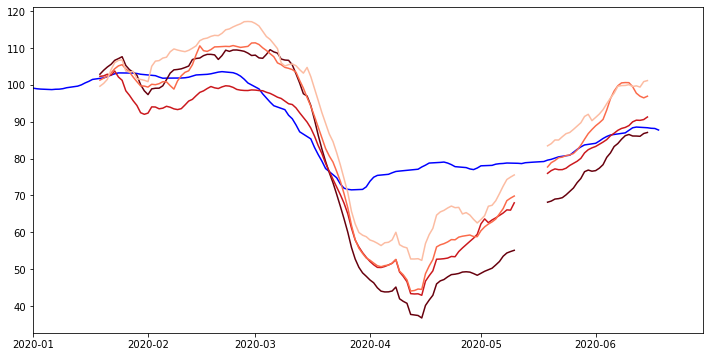

In [6]:
fig = plt.figure(figsize=(12,6))

N = 5
cmap = plt.cm.Reds_r
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))

plt.plot(allords.index, 100.0 * allords["High"].rolling(window=7).mean() / allords_dec_highs, color="Blue")

plt.plot(au_apple_data["Date"], au_apple_data["Victoria"].rolling(window=7).mean())
plt.plot(au_apple_data["Date"], au_apple_data["Queensland"].rolling(window=7).mean())
plt.plot(au_apple_data["Date"], au_apple_data["New South Wales"].rolling(window=7).mean())
plt.plot(au_apple_data["Date"], au_apple_data["Australian Capital Territory"].rolling(window=7).mean())

# plt.plot(act_data["Date"], 100+act_data["work_weekly"])

plt.xlim(pandas.to_datetime("2020-01-01"), pandas.to_datetime("2020-06-30"))


### Google mobility report 

These data are google searches related to travel / mobility and are amalgamated by category geographically. 
The trends are similar in the Apple and Google products but the google data also include categories that are 
related to homes, parks etc that have a counter-trend to the overall transport picture seen in the apple data.

Here we pull out the most obviously work / school - related searches and amalgmate them state-by-state.

In [7]:
google = pandas.read_csv("data/GoogleGlobal_Mobility_Report.csv", parse_dates=True, )

/Users/lmoresi/opt/anaconda3/envs/covid/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
au_google_data = google[google["country_region_code"]=="AU"]

all_of_aus     = au_google_data["sub_region_1"].isnull().copy()
au_google_data.loc[all_of_aus, "sub_region_1"] = "Australia Wide"

dates = pandas.to_datetime(au_google_data["date"]).copy()
au_google_data.insert(0, "Date", dates)

au_google_data = au_google_data.drop(['country_region_code','country_region','iso_3166_2_code','census_fips_code','sub_region_2', 'date'], axis=1)
au_google_data = au_google_data.set_index("Date")

/Users/lmoresi/opt/anaconda3/envs/covid/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
work_activities=["workplaces_percent_change_from_baseline","transit_stations_percent_change_from_baseline"]
home_activities=["residential_percent_change_from_baseline","parks_percent_change_from_baseline"]

act_data = au_google_data.loc[au_google_data["sub_region_1"] == 'Australian Capital Territory', :]
nsw_data = au_google_data.loc[au_google_data["sub_region_1"] == 'New South Wales', :]
qld_data = au_google_data.loc[au_google_data["sub_region_1"] == 'Queensland', :]
vic_data = au_google_data.loc[au_google_data["sub_region_1"] == 'Victoria', :]

for dataset in [vic_data, qld_data, act_data, nsw_data]:
    dataset.drop("sub_region_1", axis=1, inplace=True)
    d = dataset.loc[:,work_activities].rolling(window=14, axis=0, win_type="triang").mean()
    dataset.insert(1, "work_weekly", d.mean(axis=1))
    d = dataset.loc[:,home_activities].rolling(window=14, win_type="triang").mean()
    dataset.insert(1, "home_weekly", d.mean(axis=1))


/Users/lmoresi/opt/anaconda3/envs/covid/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
## Check that those trends are what we would expect. 

ax = act_data.plot(y=["work_weekly","home_weekly"])

### Searches from Google trends for Australia

Downloaded June 20, 2020

Note that the searches from the google trends web interface are all normalised as percentages (and expressed as integers) and so there are a couple of choices
  - Have all searches normalised and only compare the relative activity
  - Use patches of overlapping comparitive searches and re-scale accordingly (That what is done here by hand)

In [ ]:
search_covid = pandas.read_csv("data/GoogleTrends-CoronavirusSearches.csv", parse_dates=True, )
search_covid.columns = ['Week', 'Toilet Paper', 'Zoom', 'Lockdown', 'Quarantine', 'Coronavirus/9', 'Coronavirus']
search_covid.set_index("Week")

google_searches = search_covid.loc[2:]
google_searches = google_searches.set_index("Week")

d = pandas.to_datetime(google_searches.index)
google_searches.index = d

for col in google_searches.columns:
        cnum = pandas.to_numeric(google_searches[col], errors='coerce')
        google_searches[col] = cnum
        

    
google_searches_sm  = google_searches.resample('1D')
google_searches_sm  = google_searches_sm.interpolate(method="pchip", order=3)

#### Smoothed data

The smoothing that is added here is only for visual purposes - to patch gaps in the data (e.g. see the "lockdown" search)  and to prevent the curves standing out too much on the 
final graph. The plot below shows that this does not distort the meaning. 

In [ ]:

N = 7
cmap = plt.cm.Greens_r
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))

fig = plt.figure(figsize=(12,6))

['Toilet Paper', 'Zoom', 'Lockdown', 'Quarantine', 'Coronavirus/9']

plt.plot(google_searches.index, google_searches["Coronavirus"]/7, label=None, alpha=0.25, linewidth=10.0, color="Blue")
plt.plot(google_searches.index, google_searches["Zoom"], label=None, alpha=0.25, linewidth=10.0, color="Blue")
plt.plot(google_searches.index, google_searches["Lockdown"], label=None, alpha=0.25, linewidth=10.0, color="Blue")

plt.plot(google_searches_sm.index, google_searches_sm["Coronavirus"]/7, label="Coronavirus/7", alpha=0.5, linewidth=4.0)
plt.plot(google_searches_sm.index, google_searches_sm["Quarantine"]*4, label="Quarantine*3", alpha=0.5, linewidth=4.0)
plt.plot(google_searches_sm.index, google_searches_sm['Toilet Paper'], label="Toilet paper", alpha=0.5, linewidth=4.0)
plt.plot(google_searches_sm.index, google_searches_sm["Lockdown"], label="Lockdown", alpha=0.5, linewidth=4.0)
plt.plot(google_searches_sm.index, google_searches_sm['Zoom'], label="Zoom", alpha=0.5, linewidth=4.0)

plt.xlim(pandas.to_datetime("2020-01-01"), pandas.to_datetime("2020-06-15"))

plt.legend()
    

In [ ]:
## Everything 

from matplotlib import rcParams, cycler

fig = plt.figure(figsize=(12,12))

## Google Searches


plt.fill_between(google_searches_sm.index,0.0, 0.35 * google_searches_sm["Coronavirus"]/7,alpha=0.1, linewidth=0.0, color="#333333")
plt.fill_between(google_searches_sm.index,0.0, 0.35 * google_searches_sm["Quarantine"]*4, alpha=0.1, linewidth=0.0, color="#333333")
plt.fill_between(google_searches_sm.index,0.0, 0.35 * google_searches_sm['Toilet Paper'], alpha=0.1, linewidth=0.0, color="#333333")
plt.fill_between(google_searches_sm.index,0.0, 0.35 * google_searches_sm["Lockdown"],     alpha=0.1, linewidth=0.0, color="#333333")
plt.fill_between(google_searches_sm.index,0.0, 0.35 * google_searches_sm['Zoom'],         alpha=0.1, linewidth=0.0, color="#333333")

N = 5
cmap = plt.cm.Greens_r
colors =cmap(np.linspace(0.0, 0.5, N))

plt.plot(google_searches_sm.index, 0.35 * google_searches_sm["Coronavirus"]/7, label="Coronavirus/7", alpha=0.5, linewidth=4.0)
plt.plot(google_searches_sm.index, 0.35 * google_searches_sm["Quarantine"]*4, label="Quarantine*3", alpha=0.5, linewidth=4.0)
plt.plot(google_searches_sm.index, 0.35 * google_searches_sm['Toilet Paper'], label="Toilet paper", alpha=0.5, linewidth=4.0)
plt.plot(google_searches_sm.index, 0.35 * google_searches_sm["Lockdown"], label="Lockdown", alpha=0.5, linewidth=4.0)
plt.plot(google_searches_sm.index, 0.35 * google_searches_sm['Zoom'], label="Zoom", alpha=0.5, linewidth=4.0)


## All Ordinaries (Stock Exchange)
    
aod_scale = allords["High"].max() / 100.0    
plt.fill_between(allords_sm.index, allords_sm["Low"]/aod_scale, allords_sm["High"]/aod_scale, color="#00449980", label="All Ords (change)")
plt.scatter(allords_sm.index, allords_sm.loc[:,["High","Low"]].mean(axis=1)/aod_scale, marker='o', linewidth=0.0, s=allords_sm["Volume"]*1.0e-8, color="#00004480")

## Mobility

N = 5
cmap = plt.cm.Reds_r
colors =cmap(np.linspace(0.0, 0.75, N))

plt.plot(act_data.index, act_data["work_weekly"]-1.0*act_data["work_weekly"].loc["2020-02-29"]+110.0, c=colors[0], linewidth=3.0, label="Mobility - ACT")
plt.plot(nsw_data.index, nsw_data["work_weekly"]-1.0*nsw_data["work_weekly"].loc["2020-02-29"]+110.0, c=colors[1], linewidth=3.0, label="Mobility - NSW")
plt.plot(vic_data.index, vic_data["work_weekly"]-1.0*vic_data["work_weekly"].loc["2020-02-29"]+110.0, c=colors[2], linewidth=3.0, label="Mobility - VIC")
plt.plot(qld_data.index, qld_data["work_weekly"]-1.0*qld_data["work_weekly"].loc["2020-02-29"]+110.0, c=colors[3], linewidth=3.0, label="Mobility - QLD")

N = 5
cmap = plt.cm.Purples_r
colors =cmap(np.linspace(0.0, 0.75, N))

plt.plot(act_data.index, act_data["home_weekly"]-1.0*act_data["home_weekly"].loc["2020-02-29"]+110.0, c=colors[0], linewidth=3.0, label="Home - ACT")
plt.plot(nsw_data.index, nsw_data["home_weekly"]-1.0*nsw_data["home_weekly"].loc["2020-02-29"]+110.0, c=colors[1], linewidth=3.0, label="Home - NSW")
plt.plot(vic_data.index, vic_data["home_weekly"]-1.0*vic_data["home_weekly"].loc["2020-02-29"]+110.0, c=colors[2], linewidth=3.0, label="Home - VIC")
plt.plot(qld_data.index, qld_data["home_weekly"]-1.0*qld_data["home_weekly"].loc["2020-02-29"]+110.0, c=colors[3], linewidth=3.0, label="Home - QLD")




plt.legend(loc="center left")


xstart  = pandas.to_datetime("2020-01-01")
xfinish = pandas.to_datetime("2020-06-15")

# plt.plot((xstart, xfinish),(20.0,20.0), color="Black", linewidth=0.5, linestyle=":")
# plt.plot((xstart, xfinish),(55.0,55.0), color="Black", linewidth=1, linestyle=":")
plt.plot((xstart, xfinish),(110.0,110.0), color="Black", linewidth=1, linestyle=":")


# Dates
# 2020-03-18  - No large gatherings
# 2020-03-25  - Shops / restaurants / schools closed
# 2020-04-10  - Easter long weekend
# 2020-05-18  - Schools return (VIC / NSW)

plt.plot((pandas.to_datetime("2020-03-18"),)*2, (0.0,1000.0), color="DarkRed", linewidth=2, linestyle=":")
plt.plot((pandas.to_datetime("2020-03-25"),)*2, (0.0,1000.0), color="DarkRed", linewidth=2, linestyle=":")
plt.plot((pandas.to_datetime("2020-04-10"),)*2, (0.0,1000.0), color="DarkRed", linewidth=2, linestyle=":")
plt.plot((pandas.to_datetime("2020-05-18"),)*2, (0.0,1000.0), color="DarkRed", linewidth=2, linestyle=":")

# plt.plot((xstart, xfinish),(55.0,55.0), color="Black", linewidth=1, linestyle=":")
# plt.plot((xstart, xfinish),(100.0,100.0), color="Black", linewidth=1, linestyle=":")


plt.xlim((xstart, xfinish ))
plt.ylim(2,120)


plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) 

fig.savefig("CoronaVirusCommunityIndicators.png", dpi=200)

This is a standalone figure but it is set up so that it can be augmented with extra labels etc after the fact.